# 2 PCA 分类用于神经细胞放电分类
## 2.1 波形可视化

Text(0.5, 1.0, 'Waveform of the Spikewaves')

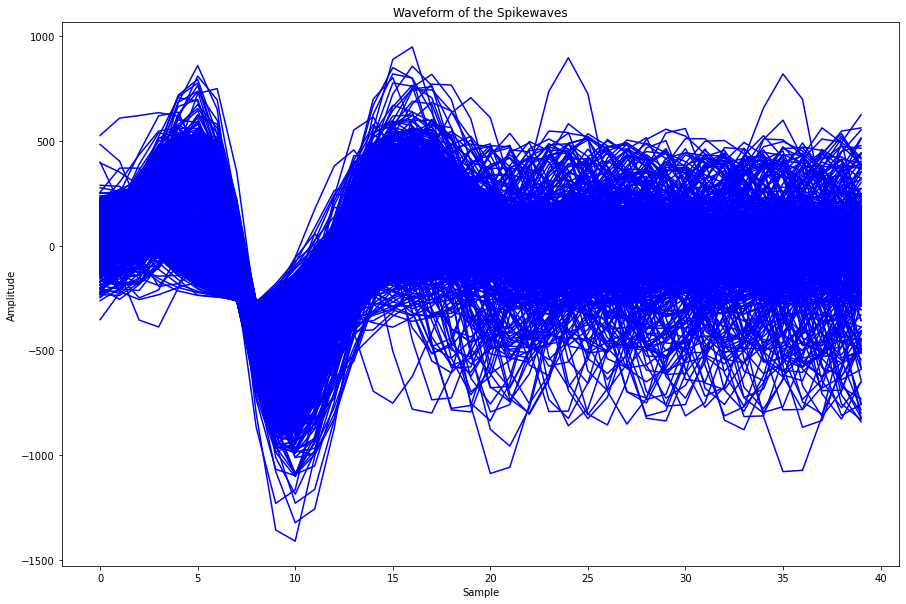

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt

data=sio.loadmat('spikewave.mat')#利用库函数读取.mat格式的文件，得到numpy向量
spike_data=data['wave'].T
data_num,data_dim=spike_data.shape

plt.figure(figsize=(15,10))
for i in range(data_num):
    plt.plot(range(data_dim),spike_data[i,:],color='blue')#叠画出各组波形
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform of the Spikewaves')

本节将波形叠画在一起后，发现每个样本的波形大致趋势比较相似，都有一个明显的下降再上升的过程。直观从图中来看，每个样本的幅度、趋势都没有明显的分类差异，可区分性较差。因此，基本无法直接从时域波形上将样本分类，需要进行后续操作。
##  2.2 PCA降维

Text(0.5, 1.0, 'Figure of the Spikewaves Projected to 2-D Space')

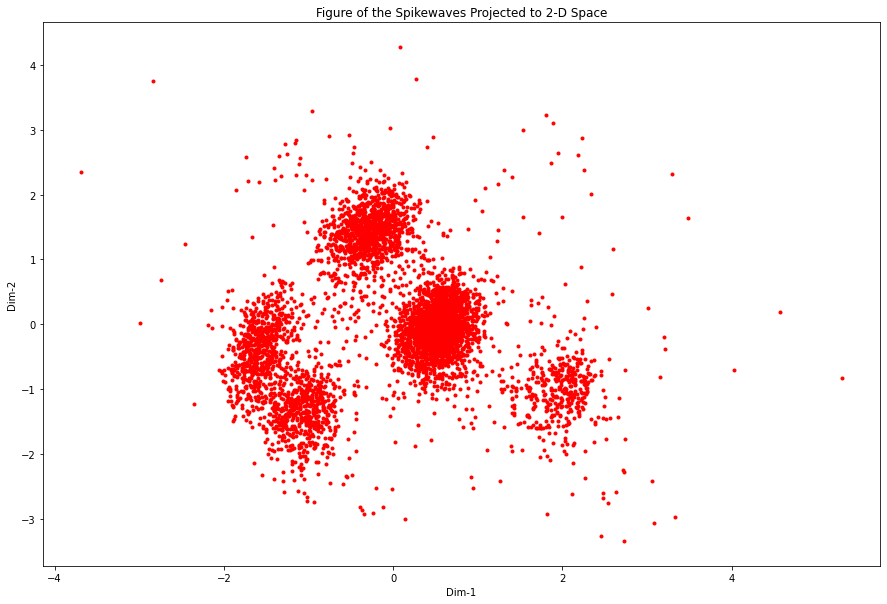

In [2]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(spike_data)#PCA降维到2维
spike_data_2d = pca_2d.transform(spike_data)

plt.figure(figsize=(15,10))
plt.scatter(spike_data_2d[:,0],spike_data_2d[:,1],marker='.',color='red')#用二维散点图可视化降维后的数据
plt.xlabel('Dim-1')
plt.ylabel('Dim-2')
plt.title('Figure of the Spikewaves Projected to 2-D Space')

Text(0.5, 0.92, 'Figure of the Spikewaves Projected to 3-D Space')

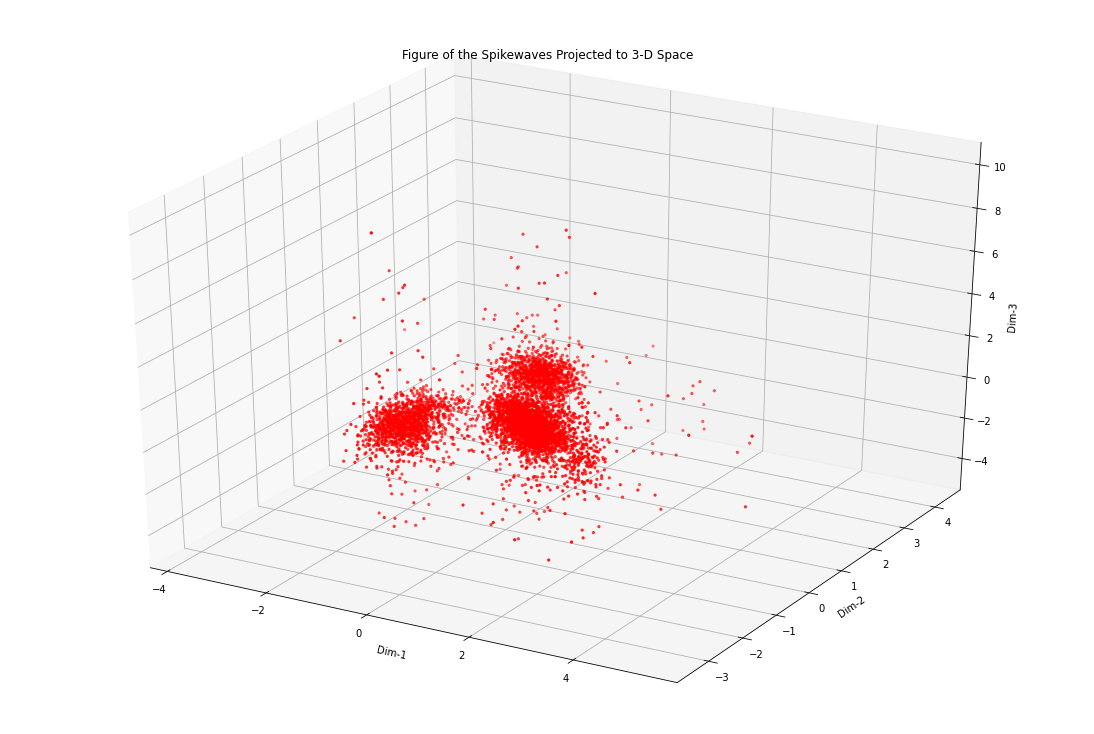

In [3]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3, svd_solver='randomized', whiten=True).fit(spike_data)#PCA降维到3维
spike_data_3d = pca_3d.transform(spike_data)

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
ax.scatter(spike_data_3d[:,0],spike_data_3d[:,1],spike_data_3d[:,2],marker='.',color='red')#用三维散点图可视化降维后的数据
ax.set_xlabel('Dim-1')
ax.set_ylabel('Dim-2')
ax.set_zlabel('Dim-3')
plt.title('Figure of the Spikewaves Projected to 3-D Space')

本节中利用PCA的方法将数据降维，降维后的样本在二维平面和三维空间中都表现出明显的聚簇特性。说明降维后样本的可区分性大大增强，可以进一步利用聚类算法进行无监督分类。
## 2.3 无监督分类——聚类

Text(0.5, 1.0, 'Figure of the Spikewaves Projected to 2-D Space')

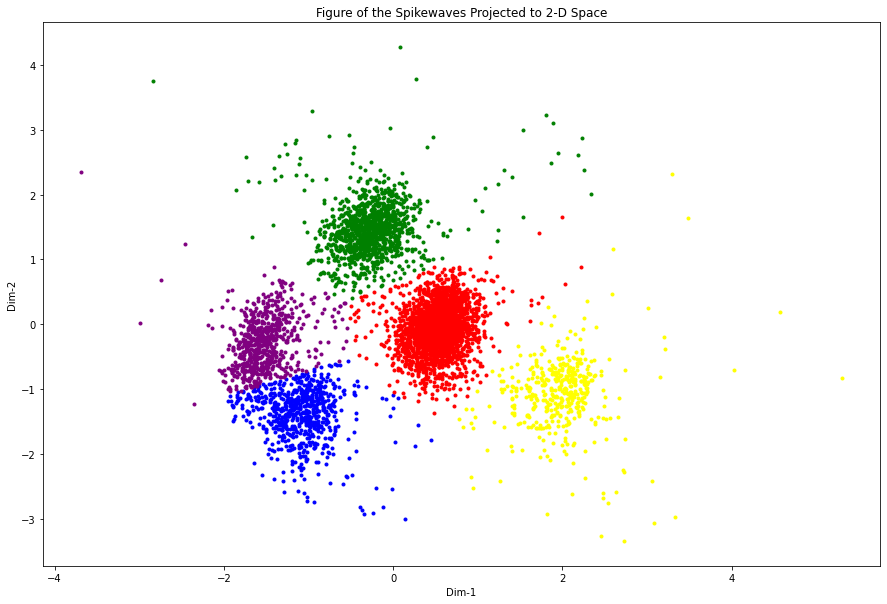

In [6]:
from sklearn.cluster import KMeans

n_clusters=5#大致观察得到聚类数目
color_dic=['blue','green','red','yellow','purple']

kmean_2d = KMeans(n_clusters=n_clusters)#利用sklearn中的K-means算法进行聚类
kmean_2d.fit(spike_data_2d)
labels_2d = kmean_2d.labels_#得到每个点所属的类别标签

plt.figure(figsize=(15,10))
for i in range(n_clusters):
    data_temp=spike_data_2d[labels_2d==i,:]#取出一个类别的样本
    plt.scatter(data_temp[:,0],data_temp[:,1],marker='.',color=color_dic[i])#用特定颜色可视化
plt.xlabel('Dim-1')
plt.ylabel('Dim-2')
plt.title('Figure of the Spikewaves Projected to 2-D Space')

Text(0.5, 0.92, 'Figure of the Spikewaves Projected to 3-D Space')

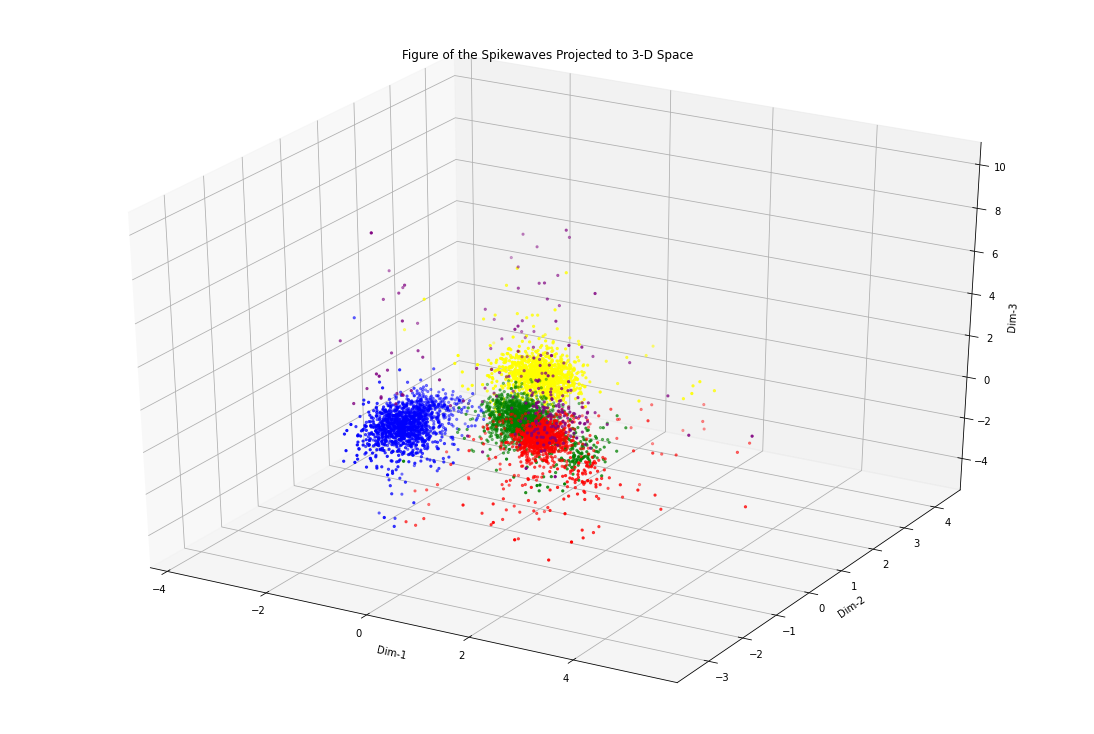

In [7]:
kmean_3d = KMeans(n_clusters=n_clusters)#利用sklearn中的K-means算法进行聚类
kmean_3d.fit(spike_data_3d)
labels_3d = kmean_3d.labels_#得到每个点所属的类别标签

fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
for i in range(n_clusters):
    data_temp=spike_data_3d[labels_3d==i,:]#取出一个类别的样本
    ax.scatter(data_temp[:,0],data_temp[:,1],data_temp[:,2],marker='.',color=color_dic[i])#用特定颜色可视化
ax.set_xlabel('Dim-1')
ax.set_ylabel('Dim-2')
ax.set_zlabel('Dim-3')
plt.title('Figure of the Spikewaves Projected to 3-D Space')

通过上一节的数据降维，本节中的聚类算法很好地将样本分为五类，在二维平面、三维空间中都呈现良好的聚簇特性。由于K-means算法初始类别中心随机确定，通过迭代得到最终聚类结果。因此，类别编号只是一个相对数字，由于类别中心的随机性，每次运行得到的相对类别编号可能变化。
K-means算法简单直接，但其弊端在于需要人工给定类别数目。在本任务中，类别数目比较容易观察得到，K-means是有效的。但在某些任务中，数据可能维度较高而无法可视化，因此需要更加高级的聚类算法，如层次聚类等，来自动确定类别数目。
##  2.4 聚类后波形可视化

Text(0.5, 1.0, 'Clustered Waveform of the Spikewaves')

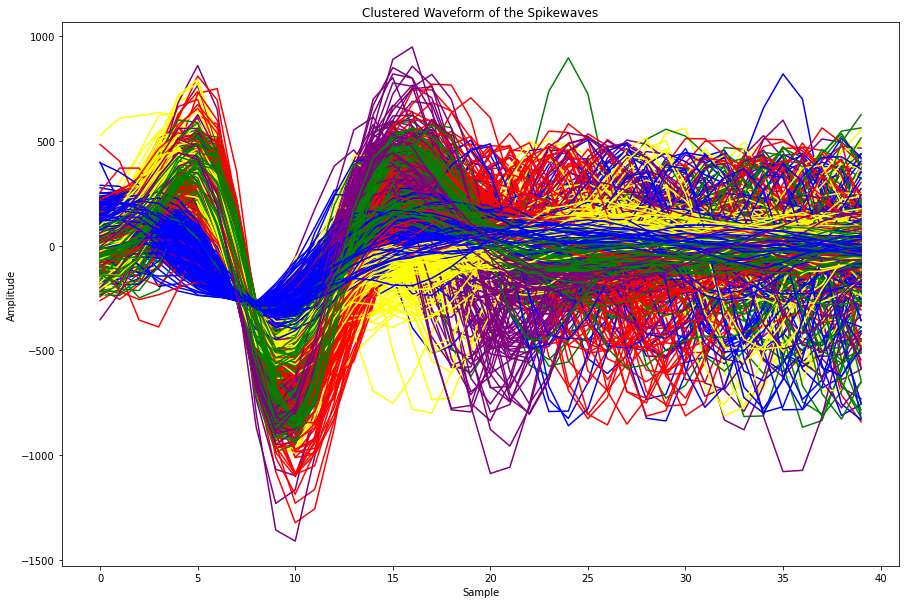

In [8]:
plt.figure(figsize=(15,10))
for i in range(data_num):
    plt.plot(range(data_dim),spike_data[i,:],color=color_dic[labels_3d[i]])#根据类别标签可视化为不同颜色
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Clustered Waveform of the Spikewaves')

通过降维、聚类后，再次可视化时域波形，可以发现在不同颜色的标记下，波形呈现出一定的类间差异，同时也有一定的类内差异：
+ 不同类别的波形有较明显的类间差异。如蓝色类别均较为平缓，下降峰不明显；紫色波形均有两个明显的下降峰和一个明显的上升峰；红色波形有明显的下降峰，但第二次下降晚于紫色波形。
+ 同一类别内部也有一定差异。同类中不同样本存在幅度的差异，也存在上升、下降时间上的差异。良好的分类应当尽量满足类间差异大、类内差异小，相关指标可以量化地用类内散度矩阵等描述。